<a href="https://colab.research.google.com/github/marepallisanthosh999333/22MH1A4238/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step-1

In [ ]:
#problem statement
#Develop a sentiment analysis model to classify reviews as positive or negative .
#Preprocess the review text using techniques such as Lower casing , removing stop words and Lemmatization
#use the trained model accurately predict the sentiment of new , unseen reviews.

In [ ]:
#import the dataset and do the data pre processing

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Reviews (1).csv')

In [ ]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [ ]:
data

Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]

In [ ]:
#we can review the top 5 rows of dataset
data.head()

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

In [ ]:
#Top 10 rows
data.head(10)

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
5     Now I am getting angry and I want my damn pho.      0
6              Honeslty it didn't taste THAT fresh.)      0
7  The potatoes were like rubber and you could te...      0
8                          The fries were great too.      1
9                                     A great touch.      1

In [ ]:
#for last 5 rows
data.tail()

Review  Liked
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

In [ ]:
#for last 10 rows in dataset
data.tail(10)

Review  Liked
990  The refried beans that came with my meal were ...      0
991         Spend your money and time some place else.      0
992  A lady at the table next to us found a live gr...      0
993            the presentation of the food was awful.      0
994           I can't tell you how disappointed I was.      0
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

In [ ]:
data.info() #dataset info like data types , entries of dataset , memory usuage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
data.isnull().sum() #checking the nul values.

Review    0
Liked     0
dtype: int64

In [ ]:
data.duplicated() #to check whether the data contains duplicated values or not

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud

In [ ]:
combined_text = " ".join(data['Review']) #combine all review text into one string

In [ ]:
wordcloud = WordCloud(width=800 ,height = 400 , background_color= 'white').generate(combined_text)

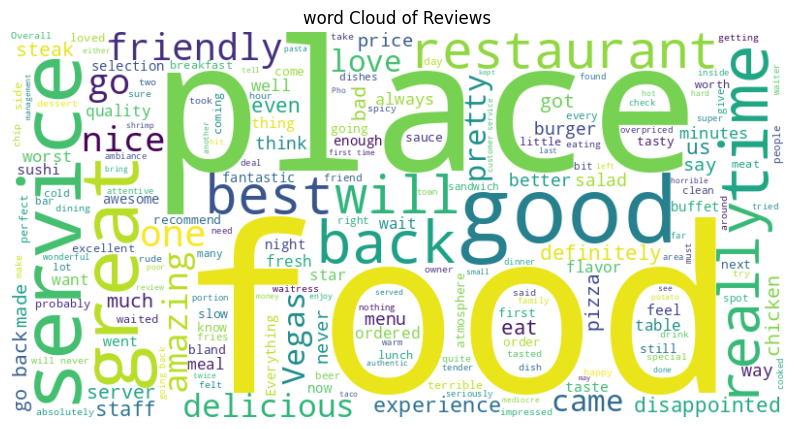

In [ ]:
#plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('word Cloud of Reviews')
plt.show()

In [ ]:
from collections import Counter

In [ ]:
targeted_words = ['good','great','amazing','bad']
all_words=" ".join(data['Review']).lower().split()  #flatten reviews into a single list of words
word_counts = Counter(all_words)
target_word_count= {word: word_counts[word] for word in targeted_words}

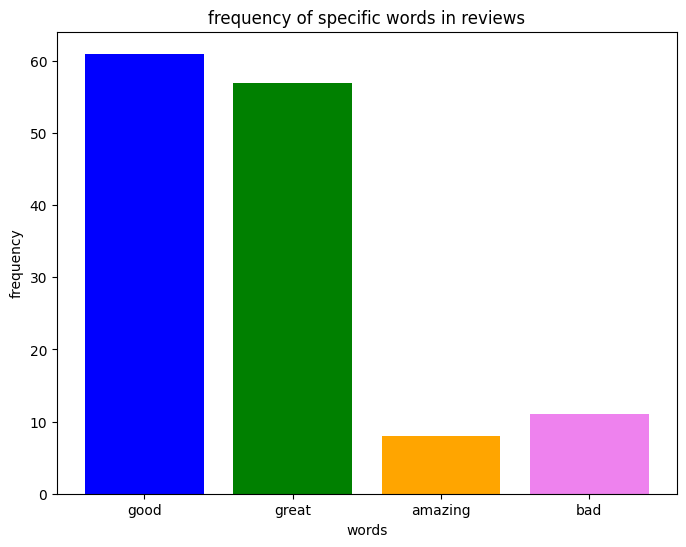

In [ ]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values() , color = ['blue','green','orange','violet'])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('frequency of specific words in reviews')
plt.show()

In [ ]:
#Text preprocessing

In [ ]:
#converting a dataset into a lower case
lower_case_reviews = data['Review'].str.lower()
print(lower_case_reviews)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [ ]:
#Tokenization-split the sentence into words
# breaking down the piece of text into smaller units,called tokens
from nltk.tokenize import word_tokenize


In [ ]:
data['Tokens'] = data['Review' ].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data['Tokens'] = data['Review'].apply(word_tokenize)
data['Tokens'] = data['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [ ]:
# Stemming
# Stemming is the process of reducing words to its base or root node
from nltk.stem import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

In [ ]:
data['stemmed'] = data['Review'].apply(lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)]))

In [ ]:
print(data['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [ ]:
print(data['stemmed'].value_counts())

stemmed
# name ?                                                                                                                               4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi p

In [ ]:
#Lemmatization- It will remove suffix
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
Lemmatizer = WordNetLemmatizer()

In [ ]:
data['lemmatized'] = data['Review'].apply(lambda x: " ".join([Lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [ ]:
print(data['lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust is not good .
2              Not tasty and the texture wa just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu wa great and so were...
                             ...                        
995    I think food should have flavor and texture an...
996                            Appetite instantly gone .
997    Overall I wa not impressed and would not go ba...
998    The whole experience wa underwhelming , and I ...
999    Then , a if I had n't wasted enough of my life...
Name: lemmatized, Length: 1000, dtype: object


In [ ]:
#Remove the numbers
import re
data['No_Numbers'] = data['Review'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [ ]:
data['cleaned_text'] = data['Review' ].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', ' ', x))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [ ]:
!pip install contractions
#Normalization
import contractions
data['Expanded'] = data['Review'].apply(lambda x: contractions.fix(x))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 13.2 MB/s eta 0:00:00


In [ ]:
data['Expanded']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 3.1 MB/s eta 0:00:00


In [ ]:
import emoji
data['Emoji'] = data['Review'].apply(emoji.demojize)

In [ ]:
print(data['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


In [ ]:
#remove HTML tags
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


<ipython-input-65-7083df19f074>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [ ]:
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [ ]:
#TF - IDF VECTORIZER

#TF = Term Frequency , IDF = Invest Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['Review'])

In [ ]:
print(x.toarray)

<bound method _cs_matrix.toarray of <1000x2033 sparse matrix of type '<class 'numpy.float64'>'
	with 9762 stored elements in Compressed Sparse Row format>>


In [ ]:
#Building Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score  , classification_report

In [ ]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['Review'])
y = data['Liked']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
print(x_train,x_test,y_train,y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [ ]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(report)

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

